In [1]:
from altaipony.lcio import from_mast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)
%matplotlib inline

In [2]:
df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\TESS_catalogue_revised.csv")

<>:1: DeprecationWarning: invalid escape sequence '\V'
<>:1: DeprecationWarning: invalid escape sequence '\V'
C:\Users\thoma\AppData\Local\Temp\ipykernel_28508\3915017766.py:1: DeprecationWarning: invalid escape sequence '\V'
  df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\TESS_catalogue_revised.csv")


In [3]:
df.loc[776]

Unnamed: 0.1                              1017
Unnamed: 0                                1017
TIC ID                             TIC 9707662
Teff                               3489.510000
logg                                  4.750000
Flare #                                      4
Observation time                    109.418341
Average flare duration                0.218753
Longest flare duration                0.312507
Shortest flare duration               0.104167
Average percentage increase    55258293.147773
Highest percentage increase   217451360.961777
Lowest percentage increase       125725.209904
Name: 776, dtype: object

In [5]:
flc = from_mast("TIC 9707662", mode="LC", mission="TESS")

17% (217/1245) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
17% (217/1245) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
4% (49/1245) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
4% (49/1245) of the cadences will be ignored due to the quality mask (quality_bitmask=175).


In [6]:
flc = flc[1]

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

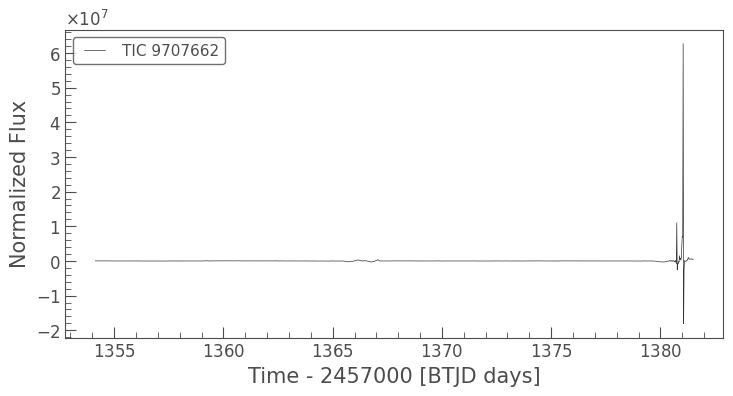

In [7]:
flc.plot()

In [8]:
flc = flc.detrend("savgol")

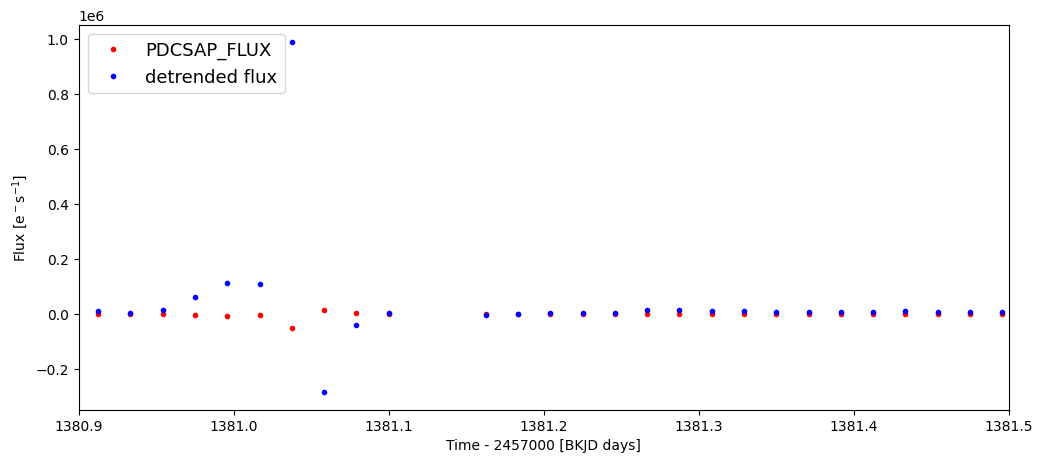

In [13]:
plt.figure(figsize=(12,5))

plt.plot(flc.time.value, flc.flux / np.nanmedian(flc.flux), "r.", label="PDCSAP_FLUX")
plt.plot(flc.time.value, flc.detrended_flux / np.nanmedian(flc.detrended_flux), "b.", label="detrended flux")

plt.xlabel("Time - 2457000 [BKJD days]")
plt.ylabel(r"Flux [e$^-$s$^{-1}$]")

plt.xlim(1380.9, 1381.5)
#plt.ylim(.95,1.25)

plt.legend(loc=2,fontsize=13);

In [11]:
test.flares

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,total_n_valid_data_points
0,566,581,6650,6665,1366.016604,1366.329111,21788965.751000628,534123.6089436344,1257.2520990434332,0.312507,1228.000000
1,610,619,6695,6704,1366.954126,1367.141630,13797793.891049353,193244.30161291256,1483.9356004022436,0.187505,1228.000000
2,1203,1208,7367,7372,1380.954234,1381.058400,5102366301.407939,117635329.02183361,2174513.6096177744,0.104167,1228.000000
3,1214,1227,7380,7393,1381.225067,1381.495901,457464253.6854434,3825457.6653658655,33076.928593694625,0.270833,1228.000000


In [10]:
test = flc.find_flares(N1 = 3, N2 = 3, N3 = 4)

Found 2 candidate(s) in the (0,620) gap.
Found 2 candidate(s) in the (620,1228) gap.
C:\Users\thoma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\altaipony\altai.py:210: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lc.flares = pd.concat([lc.flares, new], ignore_index=True)
